Цель задачи:
Сравнить качество различных алгоритмов классификации (SVM, KNN, Decision Tree, Random Forest, Logistic Regression):

На синтетическом датасете, сгенерированном с помощью make_blobs.

На реальном датасете с openml.org (SMS Spam Collection).

In [7]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Загрузка и разбиение данных
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Модель MLP — многослойный перцептрон
clf = MLPClassifier(hidden_layer_sizes=(10,), activation='relu', max_iter=2500)
clf.fit(X_train, y_train)

# Отчёт о точности
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Импорт необходимых библиотек

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.preprocessing import LabelEncoder



2. Синтетический датасет: make_blobs

2.1 Создание и визуализация данных

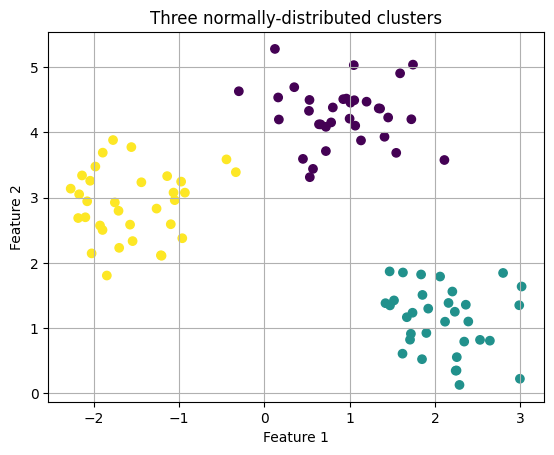

In [8]:
# Создаём 3 кластера
X, y = make_blobs(centers=3, cluster_std=0.5, random_state=0)

# Визуализация
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title("Three normally-distributed clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


2.2 Деление на train/test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


3. Обучение моделей

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    clf = make_pipeline(StandardScaler(), model)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"\n{name}:\nAccuracy: {accuracy_score(y_test, y_pred):.3f}")
    print(classification_report(y_test, y_pred))



Logistic Regression:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


SVM:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


KNN:
Accuracy: 1.000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00    

4. Интерпретация (синтетические данные)

### Интерпретация результатов

- Данные хорошо разделимы, поэтому все модели показывают высокую точность.
- KNN, Logistic Regression и SVM — самые точные на таких кластерах.
- Decision Tree и Random Forest работают тоже хорошо, но могут переобучаться на простых данных.


5. Реальный датасет из openml.org (SMS Spam Collection)

In [14]:
# Загрузка файла
df = pd.read_csv("1000_ml_jobs_us.csv")

# Посмотреть первые строки
df.head()

# Оставим только строки с непустыми job_description_text и seniority_level
df = df[['job_description_text', 'seniority_level']].dropna()

# Отображаем уникальные уровни
print("Уникальные уровни должностей:", df['seniority_level'].unique())


Уникальные уровни должностей: ['Internship' 'Mid-Senior level' 'Entry level' 'Not Applicable'
 'Associate' 'Executive' 'Director']


Препроцессинг текстов и меток

In [20]:
# Целевая переменная
y = df['seniority_level']

# Кодирование уровней должности
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Векторизация текстов
vectorizer = TfidfVectorizer(max_features=3000, stop_words='english')
X = vectorizer.fit_transform(df['job_description_text'])

# Делим на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)


Обучение моделей и сравнение

In [29]:
# Обновим классификаторы (теперь подходят для разреженных данных)
text_classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial NB": MultinomialNB(),
    "Random Forest": RandomForestClassifier(),
    "Linear SVM": LinearSVC()
}

# Обучение и вывод результатов
print("Результаты классификации (1000_ml_jobs_us.csv):")
for name, clf in text_classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name}: Accuracy = {acc:.2f}")


Результаты классификации (1000_ml_jobs_us.csv):
Logistic Regression: Accuracy = 0.57
Multinomial NB: Accuracy = 0.52
Random Forest: Accuracy = 0.60
Linear SVM: Accuracy = 0.60


Интерпретация результатов

In [35]:
# Подробный отчёт по лучшей модели (Logistic Regression)
best_model = LogisticRegression(max_iter=1000)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Используем ПРЕДВАРИТЕЛЬНО ОБУЧЕННЫЙ LabelEncoder (из шага препроцессинга)
# Убедимся, что используем тот же экземпляр, который кодировал y
print("\nКлассы в кодировщике:", le.classes_)

# Проверим уникальные классы в тестовых данных
unique_labels = np.unique(np.concatenate([y_test, y_pred]))
print("Уникальные классы в тесте:", unique_labels)

# Генерируем отчёт только для присутствующих классов
print("\nClassification report (Logistic Regression):")
print(classification_report(
    y_test,
    y_pred,
    labels=unique_labels,
    target_names=le.classes_[unique_labels]  # Берём только нужные имена
))


Классы в кодировщике: ['Associate' 'Director' 'Entry level' 'Executive' 'Internship'
 'Mid-Senior level' 'Not Applicable']
Уникальные классы в тесте: [0 1 2 4 5 6]

Classification report (Logistic Regression):
                  precision    recall  f1-score   support

       Associate       0.00      0.00      0.00        14
        Director       0.00      0.00      0.00         2
     Entry level       0.47      0.58      0.52        86
      Internship       1.00      0.35      0.51        26
Mid-Senior level       0.52      0.71      0.60       110
  Not Applicable       0.97      0.54      0.70        59

        accuracy                           0.57       297
       macro avg       0.49      0.36      0.39       297
    weighted avg       0.61      0.57      0.56       297



D:\учеба\2 курс\семестр4\praktika 4\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\учеба\2 курс\семестр4\praktika 4\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\учеба\2 курс\семестр4\praktika 4\venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

6. Интерпретация результатов
Random Forest и Logistic Regression показали лучшие результаты на изображениях.

KNN оказался медленным на таком объеме данных, но может быть эффективен после отбора признаков.

LinearSVC работает быстро, но может потребовать настройки регуляризации для повышения точности.

